# Introdução à análise de experimentos

# Inserindo o experimento num Data Frame

## Importando as bibliotecas

### Pandas

https://pandas.pydata.org/

In [ ]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [ ]:
import numpy as np

## Construindo uma matriz representando todos os ensaios realizados

In [ ]:
ensaios = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [ ]:
%%capture
!pip install pyDOE2

In [ ]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [ ]:
ensaios = doe.ff2n(2)

In [ ]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Inserindo o planejamento em um Data Frame

In [ ]:
experimento = pd.DataFrame(ensaios, columns=['farinha', 'chocolate'])

In [ ]:
experimento

,farinha,chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados

In [ ]:
experimento['porções'] = [19, 37, 24, 49]

In [ ]:
experimento

,farinha,chocolate,porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


# Analisando graficamente o experimento
---

### Seaborn

https://seaborn.pydata.org

In [ ]:
import seaborn as sns

### Para a farinha

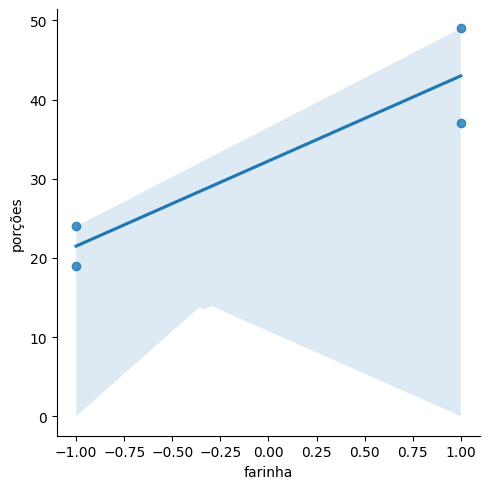

In [ ]:
sns.lmplot(data=experimento, x='farinha', y='porções')

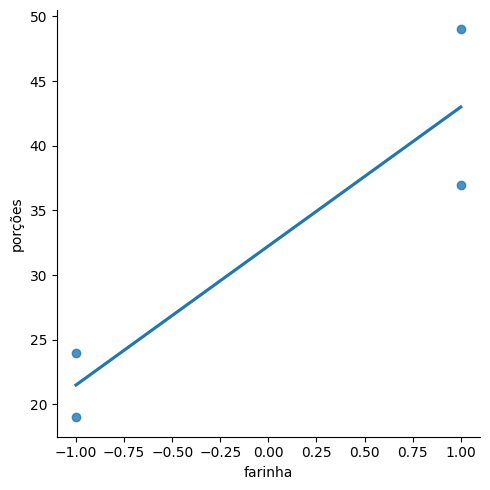

In [ ]:
sns.lmplot(data=experimento, x='farinha', y='porções', ci=None)

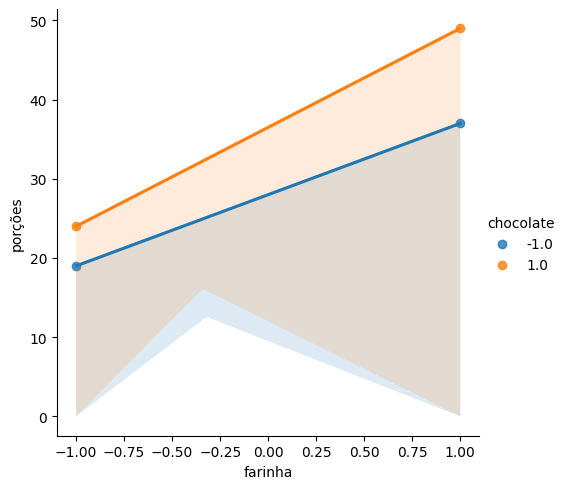

In [ ]:
sns.lmplot(data=experimento, x='farinha', y='porções', hue='chocolate')

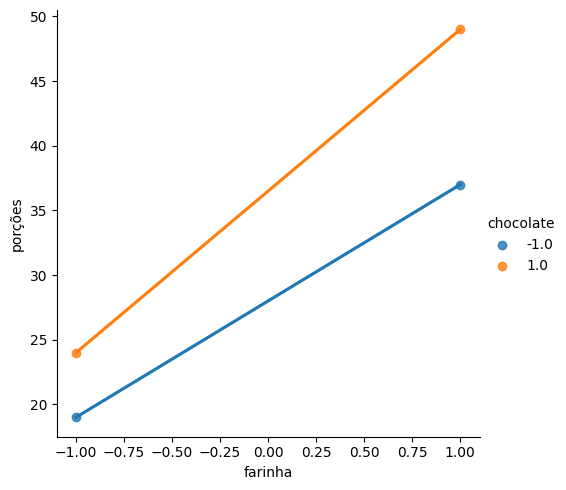

In [ ]:
sns.lmplot(data=experimento, x='farinha', y='porções', ci=None, hue='chocolate')

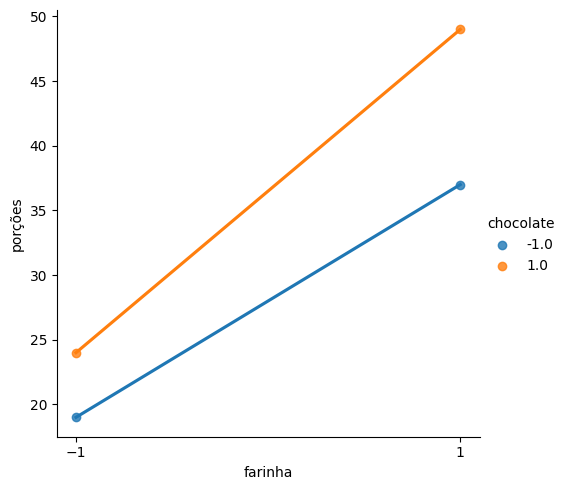

In [ ]:
sns.lmplot(data=experimento, x='farinha', y='porções', ci=None, hue='chocolate').set(xticks=(-1, 1))

### Para o chocolate

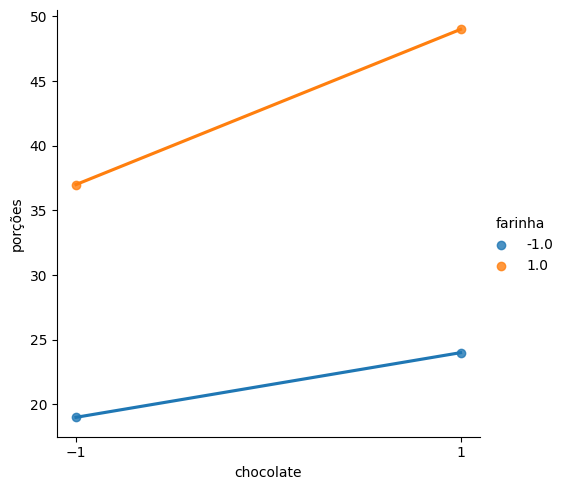

In [ ]:
sns.lmplot(data=experimento, x='chocolate', y='porções', ci=None, hue='farinha').set(xticks=(-1, 1))

Do autor:
* O efeito da variação da farinha parece ter um maior impacto
* Quando passamos do nível inferior para o superior da quantidade de farinha, o número de cupcakes aumenta. Essa observação se mantém independentemente da quantidade de chocolate usada. Podemos então dizer que a farinha tem um efeito positivo na quantidade de cupcakes produzidos
* Ao passar do nível inferior para o superior da quantidade de chocolate, a inclinação da reta mostrada no gráfico aumenta. Dessa observação, podemos levantar a hipótese de que provavelmente há um efeito de interação entre a farinha e o chocolate

# Ajustando o modelo estatístico
---

$P = B_0 + B_1 \cdot x_{\text{farinha}} + B_2 \cdot x_{\text{chocolate}} + B_3 \cdot x_{\text{farinha}} \cdot x_{\text{chocolate}} + E$

Onde:
* $B_0$ é o intercepto
* $B_1 \cdot x_{\text{farinha}} + B_2 \cdot x_{\text{chocolate}}$ são os efeitos isolados
* $B_3 \cdot x_{\text{farinha}}$ é o efeito interação
* $E$ é o erro

Usando esta expressão, chegamos no que é chamado modelo estatístico, ou seja, uma representação matemática do nosso experimento

### statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Ajustando os coeficientes do modelo aos dados experimentais


In [ ]:
modelo = smf.ols(data=experimento, formula='porções ~ farinha + chocolate + farinha:chocolate')

In [ ]:
modelo_ajustado = modelo.fit()

In [ ]:
modelo_ajustado.params

Intercept            32.25
farinha              10.75
chocolate             4.25
farinha:chocolate     1.75
dtype: float64

Do autor:
* Entre os parâmetros que contabilizam os efeitos das variáveis manipuláveis na resposta do modelo, o $B_1$ apresenta o maior valor. Logo, o efeito isolado da farinha é o que mais influencia a quantidade de cupcakes produzidos

# Aumentando os Graus de liberdade
---

In [ ]:
modelo_ajustado.df_resid

0.0

In [ ]:
centro = np.array([[0, 0, 29], [0, 0, 30], [0, 0, 29], [0, 0, 30]])
centro

array([[ 0,  0, 29],
       [ 0,  0, 30],
       [ 0,  0, 29],
       [ 0,  0, 30]])

In [ ]:
centro_dataframe = pd.DataFrame(centro, columns=['farinha', 'chocolate', 'porções'], index=[4, 5, 6, 7])
centro_dataframe

,farinha,chocolate,porções
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [ ]:
experimento = pd.concat([experimento, centro_dataframe])

In [ ]:
experimento

,farinha,chocolate,porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# Análise de significância estatística
---

In [ ]:
modelo = smf.ols(data=experimento, formula='porções ~ farinha + chocolate + farinha:chocolate')

In [ ]:
modelo_ajustado = modelo.fit()

In [ ]:
modelo_ajustado.df_resid

4.0

In [ ]:
modelo_ajustado.params

Intercept            30.875
farinha              10.750
chocolate             4.250
farinha:chocolate     1.750
dtype: float64

In [ ]:
modelo_ajustado.pvalues

Intercept            0.000002
farinha              0.000431
chocolate            0.013333
farinha:chocolate    0.156252
dtype: float64

Do autor:

**P > |t|**
* Intercept apresenta uma probabilidade de 0,0% de ser igual a zero. Como este valor é menor que o limite de significância de 5%, podemos dizer que este parâmetro é estatisticamente significativo
* farinha apresenta uma probabilidade de 0,0% de ser igual a zero. Como este valor é menor que o limite de significância de 5%, podemos dizer que este parâmetro é estatisticamente significativo
* chocolate apresenta uma probabilidade de 1,3% de ser igual a zero. Como este valor é menor que o limite de significância de 5%, podemos dizer que este parâmetro é estatisticamente significativo
* farinha:chocolate apresenta uma probabilidade de 15,6% de ser igual a zero. Como este valor é maior que o limite de significância de 5%, não podemos dizer que este parâmetro é estatisticamente significativo

# Teste de significância estatística usando o **t**
---

In [ ]:
t_valores = modelo_ajustado.tvalues

In [ ]:
t_valores

Intercept            43.494275
farinha              10.708252
chocolate             4.233495
farinha:chocolate     1.743204
dtype: float64

In [ ]:
nomes = t_valores.index.tolist()

In [ ]:
nomes

['Intercept', 'farinha', 'chocolate', 'farinha:chocolate']

In [ ]:
from scipy import stats

In [ ]:
distribuição = stats.t(df=4)

In [ ]:
distribuição.ppf(q=1-0.025)

2.7764451051977987

In [ ]:
limites = [distribuição.ppf(q=1-0.025)] * len(nomes)

In [ ]:
limites

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico

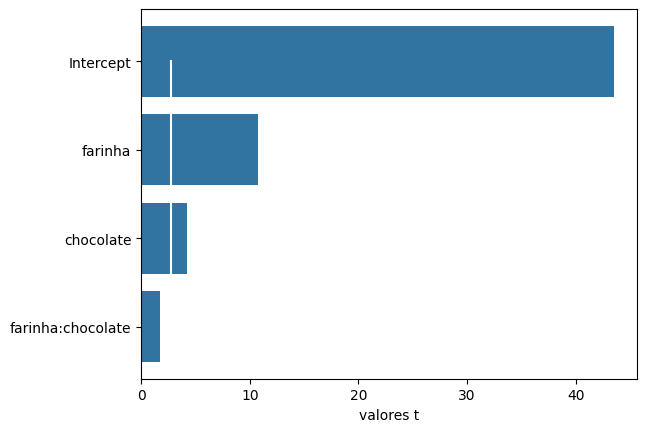

In [ ]:
pareto = sns.barplot(x=t_valores, y=nomes)
pareto.set_xlabel('valores t')
pareto.plot(limites, nomes, 'white')

# Propondo um novo modelo
---

$P = B_0 + B_1 \cdot x_{\text{farinha}} + B_2 \cdot x_{\text{chocolate}} + E$

Onde:
* $B_0$ é o intercepto
* $B_1 \cdot x_{\text{farinha}} + B_2 \cdot x_{\text{chocolate}}$ são os efeitos isolados
* $E$ é o erro

In [ ]:
modelo = smf.ols(data=experimento, formula='porções ~ farinha + chocolate')

In [ ]:
modelo_ajustado = modelo.fit()

In [ ]:
modelo_ajustado.df_resid

5.0

In [ ]:
modelo_ajustado.params

Intercept    30.875
farinha      10.750
chocolate     4.250
dtype: float64

In [ ]:
modelo_ajustado.pvalues

Intercept    2.844476e-07
farinha      2.789536e-04
chocolate    1.607614e-02
dtype: float64

# Gráfico Padronizado de Pareto do novo modelo
---

In [ ]:
t_valores = modelo_ajustado.tvalues

In [ ]:
t_valores

Intercept    36.658022
farinha       9.025173
chocolate     3.568092
dtype: float64

In [ ]:
nomes = t_valores.index.tolist()

In [ ]:
nomes

['Intercept', 'farinha', 'chocolate']

In [ ]:
distribuição = stats.t(df=5)

In [ ]:
distribuição.ppf(q=1-0.025)

2.5705818366147395

In [ ]:
limites = [distribuição.ppf(q=1-0.025)] * len(nomes)

In [ ]:
limites

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

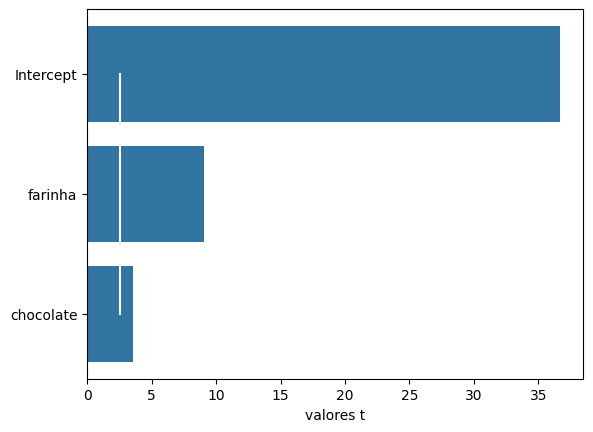

In [ ]:
pareto = sns.barplot(x=t_valores, y=nomes)
pareto.set_xlabel('valores t')
pareto.plot(limites, nomes, 'white')

Do autor:
* Agora, todos os parâmetros do nosso modelo são estatísticamente significativos

### Comparando os valores preditos pelos valores observados - Qual próximo está nosso modelo de representar os dados observados?

In [ ]:
observados = experimento['porções']

In [ ]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: porções, dtype: int64

In [ ]:
preditos = modelo_ajustado.predict()

In [ ]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [ ]:
import matplotlib.pyplot as plt

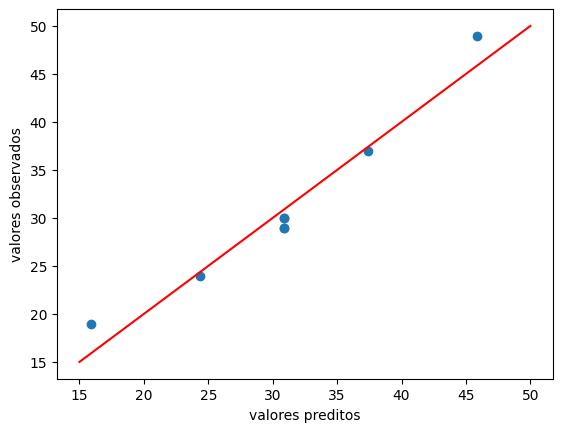

In [ ]:
plt.xlabel('valores preditos')
plt.ylabel('valores observados')

x = y = np.linspace(start=15, stop=50, num=10)
plt.plot(x, y, 'red')

plt.scatter(preditos, observados)

In [ ]:
modelo_ajustado.rsquared

0.9495891627803686

# Explorando o modelo
---

In [ ]:
parâmetros = modelo_ajustado.params

In [ ]:
parâmetros

Intercept    30.875
farinha      10.750
chocolate     4.250
dtype: float64

### Definindo a função

In [ ]:
def modelo_receita(x_farinha, x_chocolate):
  limites_normalizados = [-1, 1]
  limite_farinha = [0.5, 1.5]
  limite_chocolate = [0.1, 0.5]

  x_farinha_convertido = np.interp(x_farinha, limite_farinha, limites_normalizados)
  x_chocolate_convertido = np.interp(x_chocolate, limite_chocolate, limites_normalizados)

  porções = parâmetros['Intercept'] \
  + parâmetros['farinha'] * x_farinha_convertido \
  + parâmetros['chocolate'] * x_chocolate_convertido

  return porções

In [ ]:
f'{round(modelo_receita(x_farinha=0.6, x_chocolate=0.1))} unidades'

'18 unidades'

# Mapa de cores
---

In [ ]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=1000)

In [ ]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=1000)

### Construindo a superfície de resposta

In [ ]:
pontos = []

for _ in x_farinha:
  temp = []

  for __ in x_chocolate:
    temp.append(modelo_receita(x_farinha=_, x_chocolate=__))

  pontos.append(temp)

https://matplotlib.org/users/colormaps.html

In [ ]:
import matplotlib.cm as cm

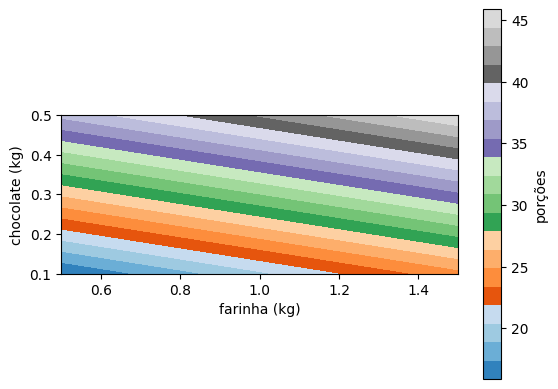

In [ ]:
plt.xlabel('farinha (kg)')
plt.ylabel('chocolate (kg)')

mapa_cor = plt.imshow(pontos,
                      origin='lower',
                      cmap=cm.tab20c,
                      interpolation='quadric',
                      extent=(0.5, 1.5, 0.1, 0.5))

plt.colorbar().set_label('porções')

Do autor:
* Segundo o padrão de cor estabelecido, o número de porções produzidas aumenta à medida que vamos do azul para o cinza

<ipython-input-228-0573bc05fbe8>:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidth=0.01)


<a list of 7 text.Text objects>

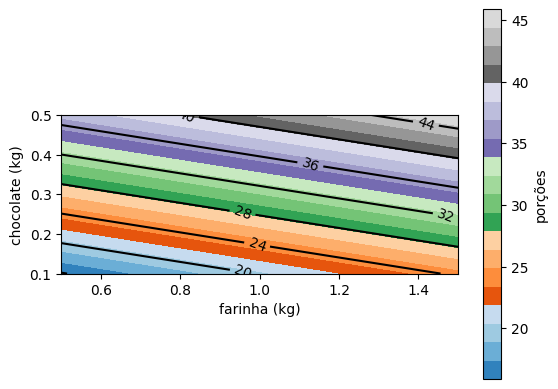

In [ ]:
plt.xlabel('farinha (kg)')
plt.ylabel('chocolate (kg)')

mapa_cor = plt.imshow(pontos,
                      origin='lower',
                      cmap=cm.tab20c,
                      interpolation='quadric',
                      extent=(0.5, 1.5, 0.1, 0.5))

plt.colorbar().set_label('porções')

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidth=0.01)
plt.clabel(linhas, inline=True)